In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

''

In [4]:
df = pd.read_csv('C:/Users/xyp9x/Desktop/research/complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [5]:
# Renaming columns 
df = df.rename(columns={'narrative':'tweet' })

# Removing SNo column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,product,tweet
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [6]:
# Analysing dataframe attributes 
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.dtypes))
print('* Count of different product categories:\n {}\n'.format(df['product'].value_counts()))
print('* Number of NaNs among tweets are: {}\n'.format(df['tweet'].isnull().sum())) 

* Size of dataframe: (162421, 2)

* Datatype of columns are:
 product    object
tweet      object
dtype: object

* Count of different product categories:
 product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64

* Number of NaNs among tweets are: 10



In [7]:
# Removing NaNs
df = df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(df['tweet'].isnull().sum(), df.shape))

NaNs are removed from the dataframe. Number of NaNs can be confirmed to be 0. The size of dataframe has reduced to (162411, 2)


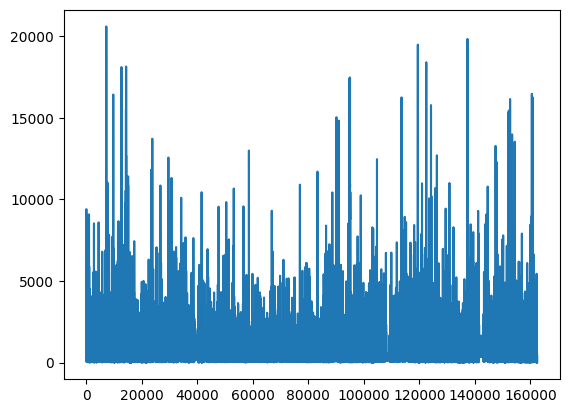

In [8]:
# Plotting word lenghts of tweets
word_length = [len(x) for x in df['tweet']]
plt.plot(word_length)

In [9]:
# Converting sentences to string
df['tweet'] = df['tweet'].astype(str)

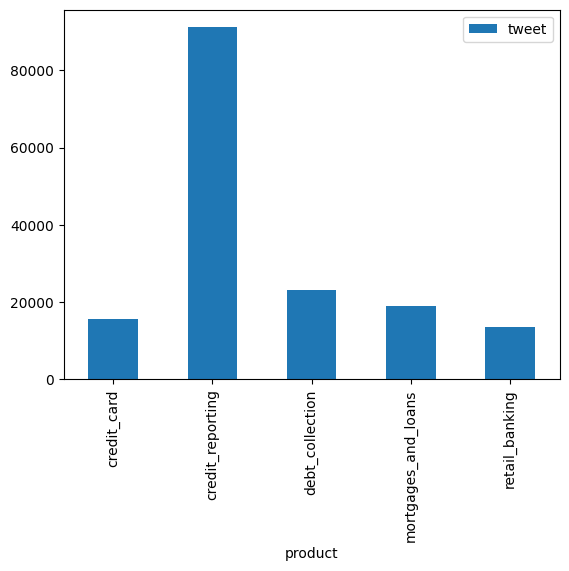

In [10]:
# Plotting product value counts
df.groupby('product').count().plot(kind='bar')
plt.show()

In [11]:
# Importing train test splilt library 
from sklearn.model_selection import train_test_split

# Train-Test Splitting
train_data, test_data = train_test_split(df, test_size = 0.20)

In [12]:
# Train and test data dimensions
train_data.shape, test_data.shape

((129928, 2), (32483, 2))

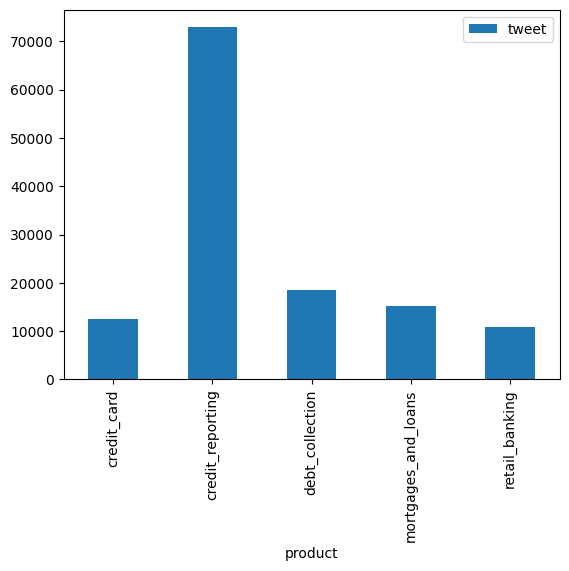

In [13]:
# Balance of train data
train_data.groupby('product').count().plot(kind='bar')
plt.show()

In [14]:
# Train set value counts 
train_data.groupby('product').count()

,tweet
product,
credit_card,12460
credit_reporting,72923
debt_collection,18480
mortgages_and_loans,15231
retail_banking,10834


In [15]:
# Randomly selecting 7000 indices in classes with low value count
import numpy as np
to_add_1 = np.random.choice(train_data[train_data['product']=='credit_card'].index,size = 7000,replace=False)   
to_add_2 = np.random.choice(train_data[train_data['product']=='debt_collection'].index,size = 7000,replace=False) 
to_add_3 = np.random.choice(train_data[train_data['product']=='mortgages_and_loans'].index,size = 7000,replace=False)  
to_add_4 = np.random.choice(train_data[train_data['product']=='retail_banking'].index,size=7000,replace=False)

# Indices to be added
to_add = np.concatenate((to_add_1, to_add_2, to_add_3, to_add_4 ))
len(to_add)

28000

In [16]:
# Forming a dataframe for randomly selected indices
df_replicate = train_data[train_data.index.isin(to_add)]
df_replicate 

,product,tweet
14481,mortgages_and_loans,dear consumer financial protection bureau reas...
21533,credit_card,fraudulent transaction totaling cleared card r...
146144,debt_collection,transunion aforementioned credit collection ag...
44950,retail_banking,dispute bank middle pandemic got courage repor...
16930,credit_card,peak furloughed company result day late two pa...
...,...,...
114563,credit_card,year needed new furnace able pay one pocket fo...
55549,debt_collection,filed dispute regard incorrect item credit rep...
25418,credit_card,hey really shocked last reviewed credit report...
82508,credit_card,released someone filled stimulus check believe...


In [17]:
# Concatenating replicated df to orinigal df
train_data = pd.concat([train_data, df_replicate])
train_data['product'].value_counts()

product
credit_reporting       72923
debt_collection        25480
mortgages_and_loans    22231
credit_card            19460
retail_banking         17834
Name: count, dtype: int64

In [18]:
# Importing NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk import *

# Declaring function for text preprocessing 

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('english')  
  df_1['tweet'] = df_1['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
  
  # remove punctuations and convert to lower case
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
  
  # remove double spaces
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1  

In [19]:
# Preprocessing training and test data 
train_data = preprocess_text(train_data)
test_data = preprocess_text(test_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xyp9x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xyp9x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Verifying text preprocessing
train_data['tweet'].head()
# Declaring train labels
train_labels = train_data['product'] 
test_labels = test_data['product']


In [21]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['credit_card' 'credit_reporting' 'debt_collection' 'mortgages_and_loans'
 'retail_banking']
(array([0, 1, 2, 3, 4]), array([19460, 72923, 25480, 22231, 17834], dtype=int64))
(array([0, 1, 2, 3, 4]), array([ 3106, 18249,  4668,  3759,  2701], dtype=int64))


In [22]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 2500   

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words 
tokenizer.fit_on_texts(train_data.tweet)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_data.tweet)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(test_data.tweet)

In [24]:
# Fixing the sequence length 
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
train_data.shape, test_data.shape

((157928, 170), (32483, 170))

In [25]:
# Model Parameters
embedding_dim = 32 

In [26]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [27]:
embedding_dim = 32

# Model Training
model = Sequential()

# Specify input shape in the Embedding layer
model.add(Embedding(max_words, embedding_dim, input_shape=(max_sequence_length,)))  # Specify input shape

# Bidirectional LSTM
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))

model.add(GlobalMaxPool1D())

model.add(Dense(5, activation='softmax'))

model.summary()

c:\Users\xyp9x\Desktop\大学\math104a\python\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 170, 32)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 170, 32)        │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,437 (337.64 KB)

 Trainable params: 86,437 (337.64 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer='RMSProp', metrics = ['accuracy'])

In [29]:
# declaring weights of product categories
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}      

# training and validating model 
history = model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels)) # best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16

Epoch 1/20


KeyboardInterrupt: 

In [ ]:
# Prediction on Test Data
predicted_bi_lstm = model.predict(test_data)
predicted_bi_lstm

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


array([[1.5627990e-07, 9.9999917e-01, 4.0841334e-07, 1.2770626e-07,
        1.5160157e-07],
       [2.0815892e-07, 9.9999809e-01, 1.0669559e-06, 2.9846009e-07,
        3.2246439e-07],
       [8.7844811e-02, 8.9093423e-01, 1.6984580e-02, 1.5464458e-03,
        2.6898982e-03],
       ...,
       [1.8079566e-06, 9.9988651e-01, 4.8884172e-05, 6.2008381e-05,
        7.8011777e-07],
       [9.9995136e-01, 9.0276180e-06, 6.4137002e-06, 9.0785479e-06,
        2.4133507e-05],
       [6.4859635e-01, 3.3630922e-01, 9.5260954e-03, 5.1570369e-04,
        5.0526415e-03]], dtype=float32)

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

precision: [0.79819471 0.92108844 0.82826563 0.87000826 0.83158251]
recall: [0.7778825  0.931583   0.74377457 0.82588235 0.89923049]
fscore: [0.78790772 0.926306   0.78374957 0.84737124 0.86408451]
support: [ 3183 18168  4578  3825  2729]
################################
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3183
           1       0.92      0.93      0.93     18168
           2       0.83      0.74      0.78      4578
           3       0.87      0.83      0.85      3825
           4       0.83      0.90      0.86      2729

   micro avg       0.88      0.87      0.88     32483
   macro avg       0.85      0.84      0.84     32483
weighted avg       0.88      0.87      0.88     32483
 samples avg       0.87      0.87      0.87     32483



c:\Users\xyp9x\Desktop\大学\math104a\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


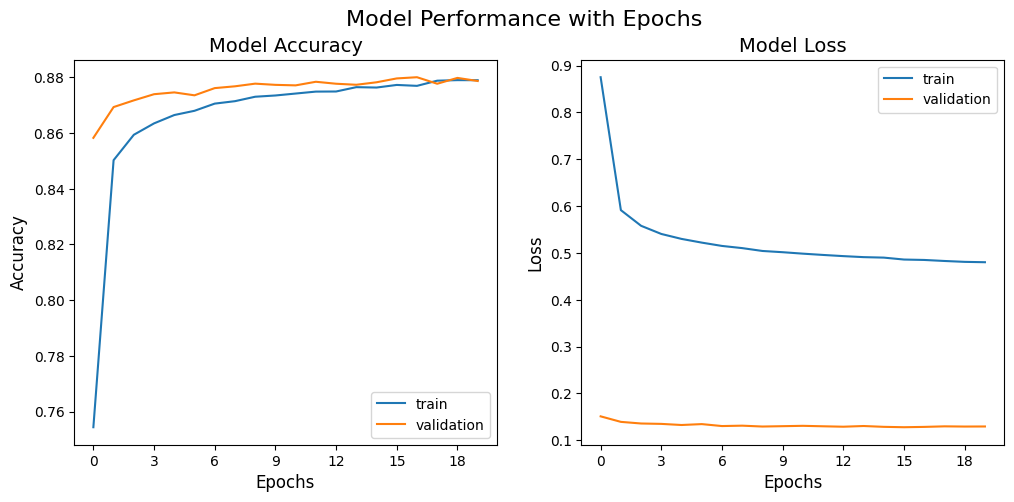

In [ ]:
def accuracy_plot(history):
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))  # Set x-axis to integers
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))  # Set x-axis to integers
    
accuracy_plot(history)

In [ ]:
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}      

# training and validating model 
bi_lstm_50 = model.fit(train_data, train_labels, batch_size=48, epochs= 50, class_weight = class_weight, validation_data=(test_data, test_labels))

In [33]:
# Prediction on Test Data
predicted_bi_lstm_50 = model.predict(test_data)
predicted_bi_lstm_50

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


array([[0.19205771, 0.20389862, 0.20344716, 0.20372422, 0.19687231],
       [0.19176173, 0.20786433, 0.20463365, 0.20112601, 0.19461426],
       [0.1911964 , 0.20721754, 0.2019433 , 0.20067659, 0.19896622],
       ...,
       [0.19131833, 0.20581734, 0.2021153 , 0.20390655, 0.19684248],
       [0.19280566, 0.20586814, 0.20295566, 0.20157094, 0.19679962],
       [0.19338337, 0.20412384, 0.20132884, 0.20417352, 0.19699042]],
      dtype=float32)

In [44]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

NameError: name 'predicted_bi_lstm' is not defined

In [40]:
def accuracy_plot(history):
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))  # Set x-axis to integers
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))  # Set x-axis to integers
    
accuracy_plot(bi_lstm_50)

NameError: name 'bi_lstm_50' is not defined

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout

# Define the model architecture with Batch Normalization
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))

# Add a Bi-LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Add another Bi-LSTM layer (optional)
model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Dense layers with Batch Normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer for multiclass classification
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to confirm the architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}     
batch_history = model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels))

Epoch 1/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 360s 108ms/step - accuracy: 0.6725 - loss: 3.6440 - val_accuracy: 0.8620 - val_loss: 0.4012
Epoch 2/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 369s 112ms/step - accuracy: 0.8399 - loss: 1.8360 - val_accuracy: 0.8708 - val_loss: 0.3784
Epoch 3/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 399s 121ms/step - accuracy: 0.8538 - loss: 1.6669 - val_accuracy: 0.8739 - val_loss: 0.3625
Epoch 4/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 420s 128ms/step - accuracy: 0.8666 - loss: 1.5351 - val_accuracy: 0.8765 - val_loss: 0.3604
Epoch 5/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 412s 125ms/step - accuracy: 0.8762 - loss: 1.4120 - val_accuracy: 0.8774 - val_loss: 0.3592
Epoch 6/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 415s 126ms/step - accuracy: 0.8851 - loss: 1.3286 - val_accuracy: 0.8786 - val_loss: 0.3674
Epoch 7/20
 119/3291 ━━━━━━━━━━━━━━━━━━━━ 6:38 126ms/step - accuracy: 0.8844 - loss: 1.3447

KeyboardInterrupt: 

In [41]:
from tensorflow.keras.layers import SimpleRNN

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(BatchNormalization())
rnn_model.add(Dropout(0.5))
rnn_model.add(SimpleRNN(64))
rnn_model.add(BatchNormalization())
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(BatchNormalization())
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(5, activation='softmax'))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\xyp9x\Desktop\大学\math104a\python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}     
rnn_history = rnn_model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels))

Epoch 1/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 107s 32ms/step - accuracy: 0.5782 - loss: 3.6798 - val_accuracy: 0.6563 - val_loss: 1.1755
Epoch 2/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - accuracy: 0.6190 - loss: 3.4723 - val_accuracy: 0.5981 - val_loss: 1.0143
Epoch 3/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 103s 31ms/step - accuracy: 0.5617 - loss: 3.8908 - val_accuracy: 0.6752 - val_loss: 0.8666
Epoch 4/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 99s 30ms/step - accuracy: 0.6095 - loss: 3.5696 - val_accuracy: 0.6625 - val_loss: 0.8289
Epoch 5/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 99s 30ms/step - accuracy: 0.5899 - loss: 3.6512 - val_accuracy: 0.6916 - val_loss: 0.7979
Epoch 6/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 100s 30ms/step - accuracy: 0.6039 - loss: 3.7077 - val_accuracy: 0.7118 - val_loss: 0.7699
Epoch 7/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 100s 30ms/step - accuracy: 0.6069 - loss: 3.7471 - val_accuracy: 0.6756 - val_loss: 0.8800
Epoch 8/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 101s 31ms/step - accuracy: 0.6

In [47]:
from tensorflow.keras.layers import Input, Conv1D, Add, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])  # Add shortcut connection
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Define the input layer
inputs = Input(shape=(max_sequence_length,))

# Embedding layer
x = Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length)(inputs)
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# Adding residual blocks
for _ in range(3):
    x = residual_block(x, filters=64)

# Global Average Pooling and Dense layers
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)

# Define the model
cnn_model = Model(inputs, outputs)

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to confirm the architecture
cnn_model.summary()



Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 170)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 170, 128)  │    320,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 170, 64)   │     24,640 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 170, 64)   │     12,352 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 170, 64)   │     12,352 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 170, 64)   │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 170, 64)   │          0 │ add_3[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 170, 64)   │     12,352 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 170, 64)   │     12,352 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 170, 64)   │          0 │ batch_normalizat… │
│                     │                   │            │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 170, 64)   │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 170, 64)   │     12,352 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 170, 64)   │        256 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 170, 64)   │     12,352 │ batch_normalizat

 Total params: 425,285 (1.62 MB)

 Trainable params: 424,261 (1.62 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [49]:
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}     
cnn_history = cnn_model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels))

Epoch 1/20
  13/3291 ━━━━━━━━━━━━━━━━━━━━ 1:45 32ms/step - accuracy: 0.1860 - loss: 11.2723

3291/3291 ━━━━━━━━━━━━━━━━━━━━ 117s 34ms/step - accuracy: 0.6857 - loss: 3.5382 - val_accuracy: 0.8613 - val_loss: 0.4147
Epoch 2/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 107s 32ms/step - accuracy: 0.8395 - loss: 1.8131 - val_accuracy: 0.8654 - val_loss: 0.3880
Epoch 3/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 109s 33ms/step - accuracy: 0.8631 - loss: 1.5366 - val_accuracy: 0.8348 - val_loss: 0.4661
Epoch 4/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 109s 33ms/step - accuracy: 0.8808 - loss: 1.3495 - val_accuracy: 0.8789 - val_loss: 0.3566
Epoch 5/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 110s 33ms/step - accuracy: 0.8960 - loss: 1.1826 - val_accuracy: 0.8770 - val_loss: 0.3695
Epoch 6/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 115s 35ms/step - accuracy: 0.9095 - loss: 1.0285 - val_accuracy: 0.8760 - val_loss: 0.3928
Epoch 7/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 109s 33ms/step - accuracy: 0.9215 - loss: 0.8969 - val_accuracy: 0.8639 - val_loss: 0.4578
Epoch 8/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 109s 33ms/step - accuracy: 0.9302 - lo

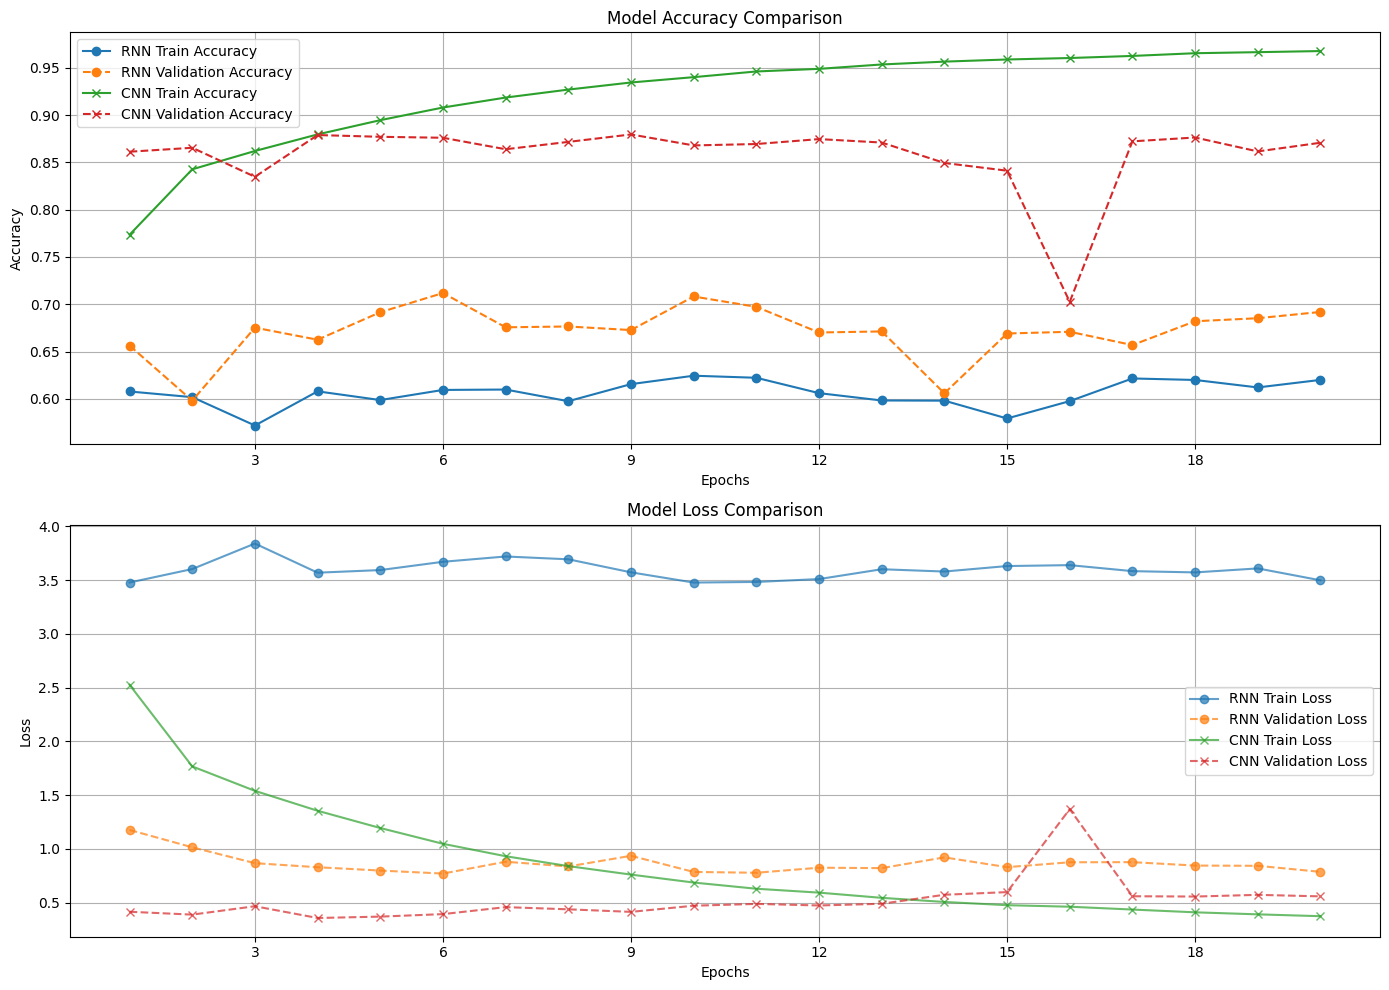

In [57]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Define the range of epochs for each model based on the number of epochs used
epochs = range(1, len(rnn_history.history['accuracy']) + 1)

plt.figure(figsize=(14, 10))

# Plot training and validation accuracy for all models
plt.subplot(2, 1, 1)
plt.plot(epochs, rnn_history.history['accuracy'], label='RNN Train Accuracy', linestyle='-', marker='o')
plt.plot(epochs, rnn_history.history['val_accuracy'], label='RNN Validation Accuracy', linestyle='--', marker='o')
plt.plot(epochs, cnn_history.history['accuracy'], label='CNN Train Accuracy', linestyle='-', marker='x')
plt.plot(epochs, cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--', marker='x')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# Plot training and validation loss for all models
plt.subplot(2, 1, 2)
plt.plot(epochs, rnn_history.history['loss'], label='RNN Train Loss', linestyle='-', marker='o', alpha=0.7)
plt.plot(epochs, rnn_history.history['val_loss'], label='RNN Validation Loss', linestyle='--', marker='o', alpha=0.7)
plt.plot(epochs, cnn_history.history['loss'], label='CNN Train Loss', linestyle='-', marker='x', alpha=0.7)
plt.plot(epochs, cnn_history.history['val_loss'], label='CNN Validation Loss', linestyle='--', marker='x', alpha=0.7)
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Set x-axis to display integers only

plt.tight_layout()
plt.show()
